# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /home/oliver/Dokumenter/masterprosjekt/predicting-solid-state-qubit-candidates/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Augmented Ferrenti summary"
InsertApproach = "02-augmented-ferrenti-approach"
numberOfPrincipalComponents = 176

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_ael_shear_modulus_vrh,AFLOWML|ml_agl_debye,AFLOWML|ml_agl_heat_capacity_Cp_300K,AFLOWML|ml_agl_heat_capacity_Cp_300K_per_atom,AFLOWML|ml_agl_heat_capacity_Cv_300K,AFLOWML|ml_agl_heat_capacity_Cv_300K_per_atom,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,AFLOWML|ml_egap_type_Insulator,candidate
0,mp-7,S6,2.0,16,-0.261676,2.0,16,-0.261676,1.000000,1.000000,...,3.930,377.683,16.791,2.886,17.163,2.762,3.440,0.000070,1,1.0
1,mp-25,N8,2.0,7,-0.266297,2.0,7,-0.266297,1.000000,1.000000,...,0.572,537.473,21.673,2.667,21.106,2.612,3.211,0.000063,1,1.0
2,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,521.822,2076.203,1.740,0.629,1.816,0.588,3.223,0.000086,1,1.0
3,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,505.647,2070.786,1.149,0.658,1.139,0.617,4.279,0.000086,1,1.0
4,mp-77,S32,2.0,16,-0.261676,2.0,16,-0.261676,1.000000,1.000000,...,4.560,369.771,96.933,2.851,88.575,2.744,2.637,0.000070,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,58.263,362.421,122.952,2.800,118.318,2.709,2.690,0.000052,1,0.0
2650,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,81.354,521.151,51.377,2.650,53.364,2.515,2.749,0.000060,0,0.0
2651,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,82.942,521.152,64.432,2.666,63.321,2.496,2.841,0.000060,0,0.0
2652,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,72.603,505.797,34.850,2.733,35.375,2.654,2.725,0.000061,0,0.0


In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

(22550, 11)

In [8]:
Summary[Summary["pretty_formula"].isin(known_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
3,mp-24,C8,C,1.0,1.000000,1.0,0.758333,1.0,0.740415,1.0,0.907523
5,mp-149,Si2,Si,1.0,0.999995,1.0,0.758333,1.0,0.820862,1.0,0.976041
7,mp-165,Si4,Si,1.0,0.999968,1.0,0.758333,1.0,0.807817,1.0,0.969212
36,mp-370,Cd1S1,CdS,1.0,1.000000,1.0,1.000000,1.0,0.930070,1.0,0.979216
37,mp-380,Zn2Se2,ZnSe,1.0,0.980394,1.0,1.000000,1.0,0.696693,1.0,0.791644
...,...,...,...,...,...,...,...,...,...,...,...
22061,mp-1203645,C48,C,1.0,1.000000,1.0,0.977273,1.0,0.787981,1.0,0.941765
22101,mp-1203790,Si68,Si,1.0,0.999982,1.0,0.870968,1.0,0.814311,1.0,0.982100
22159,mp-1204046,Si106,Si,1.0,0.999762,1.0,0.870968,1.0,0.856816,1.0,0.985963
22227,mp-1204356,Si19C19,SiC,1.0,0.992436,1.0,0.758333,1.0,0.843997,1.0,0.982537


In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
32,mp-344,B4N4,BN,1.0,0.999998,1.0,0.987952,1.0,0.806834,1.0,0.926745
161,mp-1434,Mo1S2,MoS2,1.0,0.806114,1.0,0.969697,1.0,0.757886,1.0,0.921849
179,mp-1599,B4N4,BN,1.0,0.939817,1.0,0.977273,1.0,0.801399,1.0,0.935933
299,mp-2653,B2N2,BN,1.0,0.999945,1.0,1.000000,1.0,0.830868,1.0,0.846600
317,mp-2815,Mo2S4,MoS2,1.0,0.998666,1.0,0.969697,1.0,0.650360,1.0,0.729442
2059,mp-9813,W1S2,WS2,1.0,0.986849,1.0,0.969697,1.0,0.702460,1.0,0.617317
4344,mp-20305,In1As1,InAs,1.0,0.924358,1.0,0.977273,1.0,0.770345,1.0,0.817080
12677,mp-569655,B4N4,BN,1.0,1.000000,1.0,0.987952,1.0,0.900695,1.0,0.983571
14244,mp-644751,B4N4,BN,1.0,1.000000,1.0,0.758333,1.0,0.841906,1.0,0.987961
14918,mp-685145,B1N1,BN,1.0,0.999981,1.0,0.812500,1.0,0.926992,1.0,0.990041


## How many entries does the models agree on? 

In [10]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.619261,1.0,0.969697,1.0,0.805296,1.0,0.865425
1,mp-14,Se3,Se,1.0,0.999950,1.0,0.758333,1.0,0.773990,1.0,0.979370
2,mp-19,Te3,Te,1.0,0.997149,1.0,0.977273,1.0,0.730251,1.0,0.956867
3,mp-24,C8,C,1.0,1.000000,1.0,0.758333,1.0,0.740415,1.0,0.907523
4,mp-137,Ge12,Ge,1.0,0.999795,1.0,0.977273,1.0,0.781682,1.0,0.804625
...,...,...,...,...,...,...,...,...,...,...,...
22537,mp-1277483,Li4La16Co4O32,LiLa4CoO8,1.0,0.634865,1.0,1.000000,1.0,0.599640,1.0,0.741950
22544,mp-1299874,Li4La16Co4O32,LiLa4CoO8,1.0,0.623892,1.0,1.000000,1.0,0.598835,1.0,0.847202
22545,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.999205,1.0,1.000000,1.0,0.782829,1.0,0.860288
22546,mp-1541522,Bi2P2O8,BiPO4,1.0,0.999992,1.0,0.946237,1.0,0.962639,1.0,0.988552


In [11]:
Summary[(Summary["RF Prob"] > 0.8) & 
        (Summary["DT Prob"] > 0.8) & 
        (Summary["GB Prob"] > 0.8) & 
        (Summary["LOG Prob"] > 0.8)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
6,mp-157,P4,P,1.0,0.999994,1.0,0.969697,1.0,0.864496,1.0,0.992550
12,mp-216,Sc16O24,Sc2O3,1.0,0.999999,1.0,1.000000,1.0,0.825681,1.0,0.820456
13,mp-226,Fe4S8,FeS2,1.0,0.981889,1.0,0.896552,1.0,0.896988,1.0,0.990180
15,mp-236,S4N4,SN,1.0,0.999999,1.0,0.953975,1.0,0.877742,1.0,0.981670
16,mp-241,Cd1F2,CdF2,1.0,0.999999,1.0,0.953975,1.0,0.890070,1.0,0.991457
...,...,...,...,...,...,...,...,...,...,...,...
22495,mp-1205442,Zn2Bi12P4O28F4,ZnBi6P2(O7F)2,1.0,0.889833,1.0,0.978261,1.0,0.885876,1.0,0.961534
22506,mp-1206099,Y2O6,YO3,1.0,0.986977,1.0,0.969697,1.0,0.806334,1.0,0.907515
22511,mp-1209868,Nd2Tm6S12,Nd(TmS2)3,1.0,0.993785,1.0,1.000000,1.0,0.909058,1.0,0.976507
22527,mp-1238430,Rb8C16N24,RbC2N3,1.0,0.999993,1.0,0.946237,1.0,0.945235,1.0,0.993320


In [12]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.619261,1.0,0.969697,1.0,0.805296,1.0,0.865425
1,mp-14,Se3,Se,1.0,0.999950,1.0,0.758333,1.0,0.773990,1.0,0.979370
2,mp-19,Te3,Te,1.0,0.997149,1.0,0.977273,1.0,0.730251,1.0,0.956867
3,mp-24,C8,C,1.0,1.000000,1.0,0.758333,1.0,0.740415,1.0,0.907523
4,mp-137,Ge12,Ge,1.0,0.999795,1.0,0.977273,1.0,0.781682,1.0,0.804625
...,...,...,...,...,...,...,...,...,...,...,...
22543,mp-1296711,La2Co2O6,LaCoO3,0.0,0.031129,1.0,0.953975,1.0,0.686020,1.0,0.844033
22544,mp-1299874,Li4La16Co4O32,LiLa4CoO8,1.0,0.623892,1.0,1.000000,1.0,0.598835,1.0,0.847202
22545,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.999205,1.0,1.000000,1.0,0.782829,1.0,0.860288
22546,mp-1541522,Bi2P2O8,BiPO4,1.0,0.999992,1.0,0.946237,1.0,0.962639,1.0,0.988552


In [13]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.619261,1.0,0.969697,1.0,0.805296,1.0,0.865425
1,mp-14,Se3,Se,1.0,0.999950,1.0,0.758333,1.0,0.773990,1.0,0.979370
4,mp-137,Ge12,Ge,1.0,0.999795,1.0,0.977273,1.0,0.781682,1.0,0.804625
5,mp-149,Si2,Si,1.0,0.999995,1.0,0.758333,1.0,0.820862,1.0,0.976041
6,mp-157,P4,P,1.0,0.999994,1.0,0.969697,1.0,0.864496,1.0,0.992550
...,...,...,...,...,...,...,...,...,...,...,...
22517,mp-1232408,Cs6In6P8O32,Cs3In3(PO4)4,1.0,0.996807,1.0,0.771429,1.0,0.871451,1.0,0.913762
22527,mp-1238430,Rb8C16N24,RbC2N3,1.0,0.999993,1.0,0.946237,1.0,0.945235,1.0,0.993320
22536,mp-1272351,Ba6Cr4O16,Ba3Cr2O8,0.0,0.000895,1.0,0.758333,1.0,0.832191,1.0,0.888288
22545,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.999205,1.0,1.000000,1.0,0.782829,1.0,0.860288


In [14]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.619261,1.0,0.969697,1.0,0.805296,1.0,0.865425
1,mp-14,Se3,Se,1.0,0.999950,1.0,0.758333,1.0,0.773990,1.0,0.979370
2,mp-19,Te3,Te,1.0,0.997149,1.0,0.977273,1.0,0.730251,1.0,0.956867
3,mp-24,C8,C,1.0,1.000000,1.0,0.758333,1.0,0.740415,1.0,0.907523
4,mp-137,Ge12,Ge,1.0,0.999795,1.0,0.977273,1.0,0.781682,1.0,0.804625
...,...,...,...,...,...,...,...,...,...,...,...
22544,mp-1299874,Li4La16Co4O32,LiLa4CoO8,1.0,0.623892,1.0,1.000000,1.0,0.598835,1.0,0.847202
22545,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.999205,1.0,1.000000,1.0,0.782829,1.0,0.860288
22546,mp-1541522,Bi2P2O8,BiPO4,1.0,0.999992,1.0,0.946237,1.0,0.962639,1.0,0.988552
22548,mp-1542038,Cs2Sn2Se6,CsSnSe3,1.0,0.705610,0.0,0.081967,1.0,0.657713,1.0,0.834916


In [15]:
Summary[Summary["LOG "]==1]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.619261,1.0,0.969697,1.0,0.805296,1.0,0.865425
1,mp-14,Se3,Se,1.0,0.999950,1.0,0.758333,1.0,0.773990,1.0,0.979370
2,mp-19,Te3,Te,1.0,0.997149,1.0,0.977273,1.0,0.730251,1.0,0.956867
3,mp-24,C8,C,1.0,1.000000,1.0,0.758333,1.0,0.740415,1.0,0.907523
4,mp-137,Ge12,Ge,1.0,0.999795,1.0,0.977273,1.0,0.781682,1.0,0.804625
...,...,...,...,...,...,...,...,...,...,...,...
22545,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.999205,1.0,1.000000,1.0,0.782829,1.0,0.860288
22546,mp-1541522,Bi2P2O8,BiPO4,1.0,0.999992,1.0,0.946237,1.0,0.962639,1.0,0.988552
22547,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.668093,1.0,1.000000,1.0,0.564260,0.0,0.140622
22548,mp-1542038,Cs2Sn2Se6,CsSnSe3,1.0,0.705610,0.0,0.081967,1.0,0.657713,1.0,0.834916


In [16]:
generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-19-03-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)

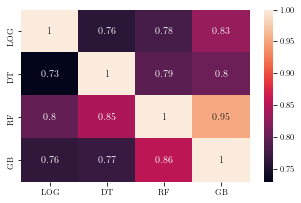

[1.0, 0.7292069632495164, 0.6402840205849781, 0.6010683343104684, 0.7694870549038662, 0.793173083186763, 0.8559702950947821, 1.0, 1.0, 0.7642900020009338, 0.7794931926258876]


,LOG LOG LOG LOG,LOG LOG LOG DT,LOG LOG RF DT,LOG RF GB DT,DT GB DT DT,DT RF DT DT,RF RF GB GB,RF RF RF RF,GB GB GB GB,GB LOG LOG LOG,RF LOG LOG LOG
LOG LOG LOG LOG,1.0,0.729207,0.640284,0.601068,0.769487,0.793173,0.85597,1.0,1.0,0.76429,0.779493
LOG LOG LOG DT,1.0,0.729207,0.640284,0.601068,0.769487,0.793173,0.85597,1.0,1.0,0.76429,0.779493
LOG LOG RF DT,1.0,0.729207,0.640284,0.601068,0.769487,0.793173,0.85597,1.0,1.0,0.76429,0.779493
LOG RF GB DT,1.0,0.729207,0.640284,0.601068,0.769487,0.793173,0.85597,1.0,1.0,0.76429,0.779493
DT GB DT DT,1.0,0.729207,0.640284,0.601068,0.769487,0.793173,0.85597,1.0,1.0,0.76429,0.779493
DT RF DT DT,1.0,0.729207,0.640284,0.601068,0.769487,0.793173,0.85597,1.0,1.0,0.76429,0.779493
RF RF GB GB,1.0,0.729207,0.640284,0.601068,0.769487,0.793173,0.85597,1.0,1.0,0.76429,0.779493
RF RF RF RF,1.0,0.729207,0.640284,0.601068,0.769487,0.793173,0.85597,1.0,1.0,0.76429,0.779493
GB GB GB GB,1.0,0.729207,0.640284,0.601068,0.769487,0.793173,0.85597,1.0,1.0,0.76429,0.779493
GB LOG LOG LOG,1.0,0.729207,0.640284,0.601068,0.769487,0.793173,0.85597,1.0,1.0,0.76429,0.779493


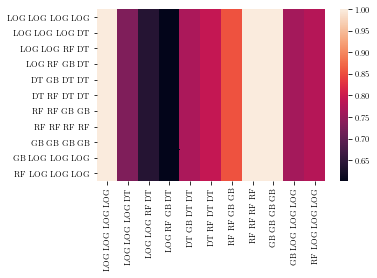

In [17]:
visualize.visualize_heatmap_of_combinations(Summary)

 44%|████▍     | 222/500 [00:00<00:00, 2212.42it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2173.93it/s]


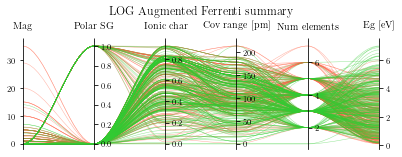

 45%|████▍     | 224/500 [00:00<00:00, 2237.85it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2184.85it/s]


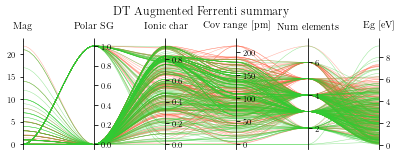

 46%|████▌     | 231/500 [00:00<00:00, 2304.09it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2266.77it/s]


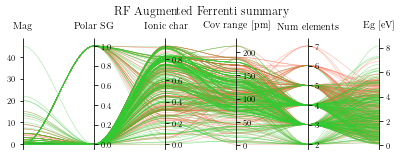

 45%|████▍     | 224/500 [00:00<00:00, 2237.36it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2043.35it/s]


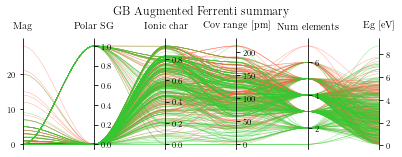

In [18]:
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)